In [46]:
import numpy as np
import pandas as pd
import math, random
import matplotlib.pyplot as plt
import os, time, torch
import tensorflow as tf
import torch.nn as nn

%matplotlib inline
np.random.seed(0)

In [47]:
def load_file( file_name ):
    return torch.load('data'+'/'+file_name)
X_train_GT, X_train_noisy, y_train = load_file('X_train_GT.pt'), load_file('X_train_noisy.pt'), load_file('y_train.pt')
X_valid_GT, X_valid_noisy, y_valid = load_file('X_valid_GT.pt'), load_file('X_valid_noisy.pt'), load_file('y_valid.pt')
X_test_GT,  X_test_noisy,  y_test  = load_file('X_test_GT.pt'), load_file('X_test_noisy.pt'), load_file('y_test.pt')


In [48]:
from sklearn.neighbors import KNeighborsRegressor

def Reg_KNN(a_i, X_train_noisy, X_train_GT, X_test_noisy):
    Reg = KNeighborsRegressor(n_neighbors=a_i, weights='uniform')
    # NOTICE: .fit := storing the entire dataset, NOT for learning process !!!
    Reg.fit(X_train_noisy, X_train_GT) 
    return torch.Tensor( Reg.predict(X_test_noisy) )

In [49]:
loss_func =  loss_func = nn.MSELoss()
y_ref = X_test_GT

In [50]:
KNN_opt = 5
X_KNN_0 = Reg_KNN(KNN_opt, X_train_noisy[:,:,0], X_train_GT[:,:,0], X_test_noisy[:,:,0]).unsqueeze(2)
X_KNN_1 = Reg_KNN(KNN_opt, X_train_noisy[:,:,1], X_train_GT[:,:,1], X_test_noisy[:,:,1]).unsqueeze(2)
X_KNN_2 = Reg_KNN(KNN_opt, X_train_noisy[:,:,2], X_train_GT[:,:,2], X_test_noisy[:,:,2]).unsqueeze(2)
X_KNN = torch.cat([X_KNN_0, X_KNN_1, X_KNN_2], dim=2)
print('KNN Loss ({} neighbors): {:.5f}'.format(KNN_opt, loss_func(X_KNN, y_ref ).item() ))

KNN Loss (5 neighbors): 0.00030


In [51]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(Reg_KNN, open(filename, 'wb'))

In [53]:
loaded_model = pickle.load(open('finalized_model.sav', 'rb'))
result = loaded_model(KNN_opt, X_train_noisy[:,:,2], X_train_GT[:,:,2], X_test_noisy[:,:,2])
print(result)

tensor([[9.6822, 9.6823, 9.6823,  ..., 9.6825, 9.6828, 9.6829],
        [9.7764, 9.7769, 9.7770,  ..., 9.7764, 9.7777, 9.7773],
        [9.7423, 9.7427, 9.7428,  ..., 9.7424, 9.7421, 9.7426],
        ...,
        [9.3302, 9.3302, 9.3300,  ..., 9.3302, 9.3302, 9.3291],
        [9.3384, 9.3388, 9.3376,  ..., 9.3385, 9.3380, 9.3376],
        [9.6165, 9.6166, 9.6174,  ..., 9.6158, 9.6163, 9.6162]])


In [60]:
from scipy import signal

In [67]:
widths = np.arange(1, 31)
cwtmatr = signal.cwt(result[0], signal.ricker, widths)

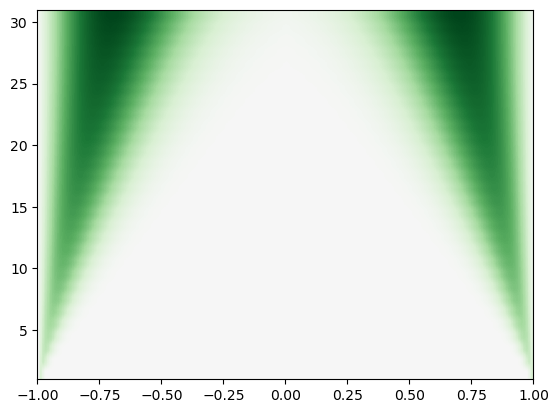

In [68]:
cwtmatr_yflip = np.flipud(cwtmatr)
plt.imshow(cwtmatr_yflip, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.show()

In [ ]:
cwt